#Capítulo 2 - Projeto de aprendizado de máquina de ponta a ponta #

### Author: Matheus Ribeiro Alencar - 494711

**Bem-vindo à Machine Learning Housing Corp.!**

*Sua tarefa é prever os valores médios das casas nos distritos da Califórnia, considerando várias características desses distritos.
Este notebook contém todos os exemplos de código e soluções para os exercícios do capítulo 2.*

## Initial notebook config


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# Seaborn and pandas
import seaborn as sns
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Setting up paths and dataset donwload

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
np.random.seed(42)

## Getting our dataset

In [ ]:
housing = load_housing_data()

## Describing and reviewing our dataset.

In [ ]:
housing.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
97,-122.26,37.81,29.0,335.0,107.0,202.0,91.0,2.0062,125000.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY


In [ ]:
# We ll check how many different values we have for ocean proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory data analysis

In [ ]:
# First of all, lets deal with ocean_proximity attribute
mapping_ocean = {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5}
housing['ocean_proximity'] = housing['ocean_proximity'].map(mapping_ocean)
housing.head(100)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,4
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,4
97,-122.26,37.81,29.0,335.0,107.0,202.0,91.0,2.0062,125000.0,4
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,4


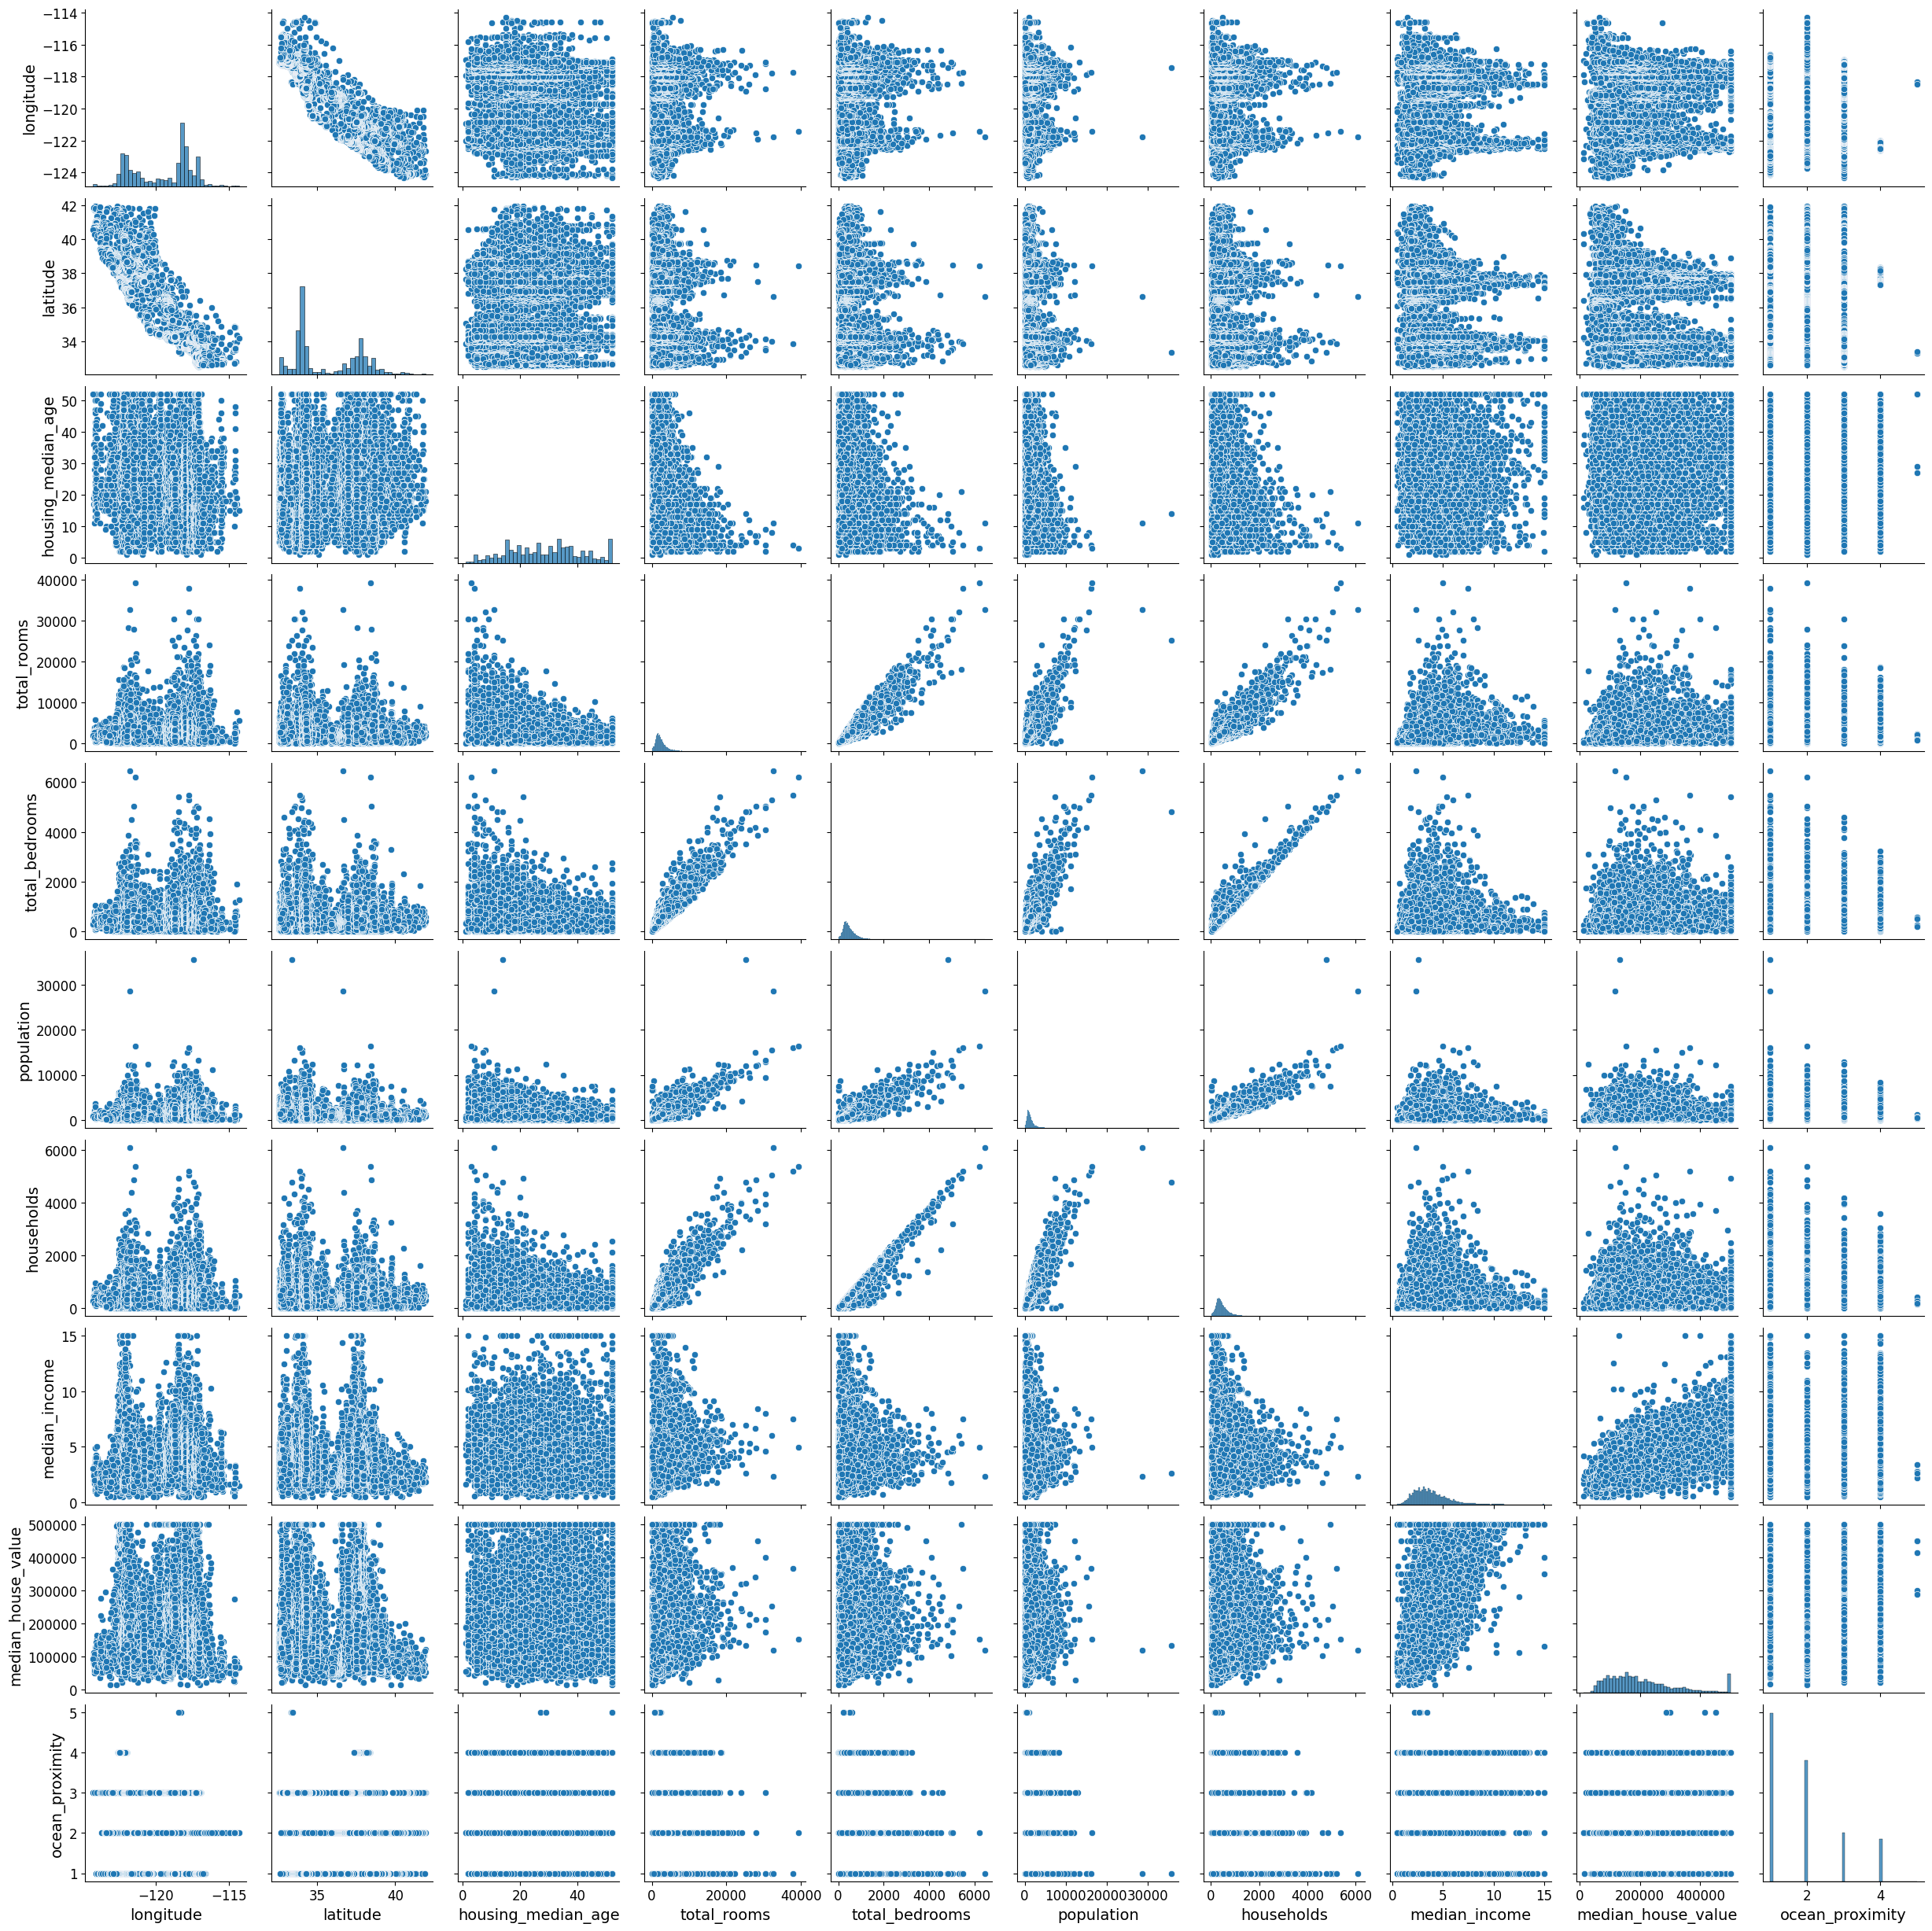

In [ ]:
# Checking which of our attributes seem to be the most correlated with median_house_value (most close to y = x)
sns.pairplot(data = housing)

In [ ]:
# Aparently only median income has great correlation with median house value (ocean_proximity and number_of_bedrooms may bee good to analyze as well)
correlations = housing.corr()['median_house_value'].sort_values(ascending=False)
print(correlations)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


## Getting rid of our outliers

## Training our model 

In [ ]:
# The median_income, total_rooms and house_median_age have some correlation with the pricing.
X = housing[['housing_median_age','median_income','total_rooms']]
y = housing['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# In this case I ll train our model with a linear regression (it could be other type of model)

from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                     Coefficient
housing_median_age   2058.203299
median_income       42916.443902
total_rooms             4.018080


## Predição nos dados de teste

In [ ]:
predictions = lm.predict(X_test)

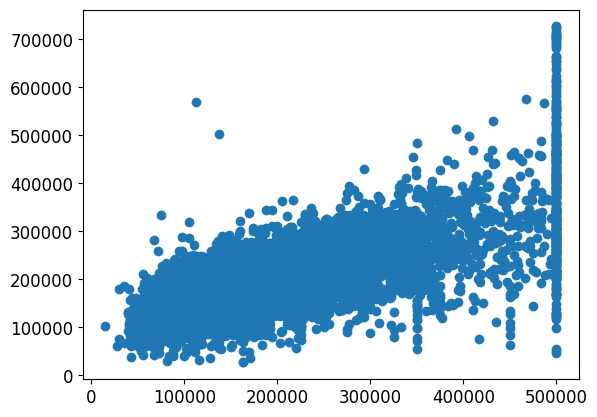

In [ ]:
# Scatter plot with our real test values versus the predicted values

plt.scatter(y_test,predictions)

In [ ]:
# The closer to a diagonal line the best... so our model is kinda bad.

## Evaluating the model


In [ ]:
# We ll evaluate our model by calculating the residual sum of squares and the explained variance score (R^2).

from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions),'\nMSE:',metrics.mean_squared_error(y_test, predictions),'\nRMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 60736.86940347775 
MSE: 6773297678.359765 
RMSE: 82300.04664858803


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.4995701373440664

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, predictions)
print("R² coefficient:", r2)

R² coefficient: 0.4994739701270866


## Trying to make a model based only on median income


In [ ]:
# The median_income, total_rooms and house_median_age have some correlation with the pricing.
X = housing[['median_income']]
y = housing['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# In this case I ll train our model with a linear regression (it could be other type of model)

from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                Coefficient
median_income  42063.980263


In [ ]:
predictions = lm.predict(X_test)

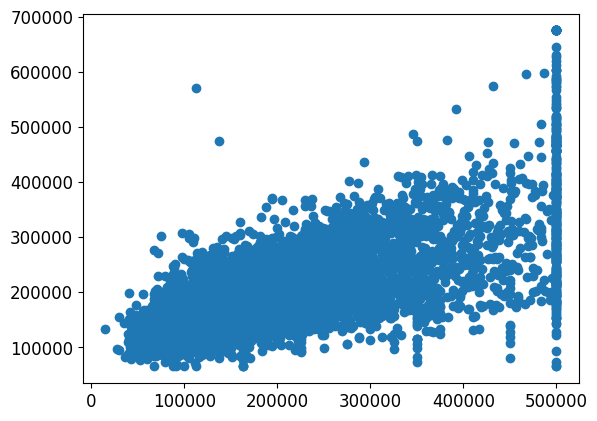

In [ ]:
# Scatter plot with our real test values versus the predicted values

plt.scatter(y_test,predictions)

In [ ]:
# The closer to a diagonal line the best... so our model is kinda bad.

In [ ]:
# We ll evaluate our model by calculating the residual sum of squares and the explained variance score (R^2).

from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions),'\nMSE:',metrics.mean_squared_error(y_test, predictions),'\nRMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 62690.1542846762 
MSE: 7197365824.767558 
RMSE: 84837.29029599871


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.46825228450898015

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, predictions)
print("R² coefficient:", r2)

R² coefficient: 0.4681366281414826


In [ ]:
# Using only median_income we got a worst result